In [5]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


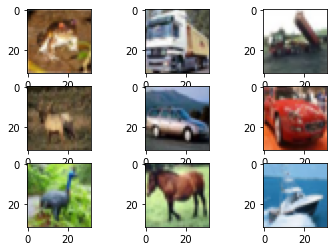

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


In [6]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test /=255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

In [7]:
#tạo model
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [11]:
from tensorflow.keras.optimizers import SGD
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer = opt,metrics='accuracy')
history = model.fit(x_train, y_train, batch_size = 64 , epochs=150,validation_data=(x_test, y_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/150
782/782 [==============================] - 18s 22ms/step - loss: 0.8313 - accuracy: 0.7084 - val_loss: 0.8764 - val_accuracy: 0.6973
Epoch 2/150
782/782 [==============================] - 17s 22ms/step - loss: 0.6924 - accuracy: 0.7572 - val_loss: 0.9425 - val_accuracy: 0.6739
Epoch 3/150
782/782 [==============================] - 17s 22ms/step - loss: 0.5864 - accuracy: 0.7930 - val_loss: 0.7352 - val_accuracy: 0.7507
Epoch 4/150
782/782 [==============================] - 17s 22ms/step - loss: 0.5002 - accuracy: 0.8237 - val_loss: 0.8392 - val_accuracy: 0.7265
Epoch 5/150
782/782 [==============================] - 17s 22ms/step - loss: 0.4240 - accuracy: 0.8496 - val_loss: 0.7918 - val_accuracy: 0.7472
Epoch 6/150
782/782 [==============================] - 17s 22ms/step - loss: 0.3644 - accuracy: 0.8713 - val_loss: 0.7718 - val_accuracy: 0.7695
Epoch 7/150
782/782 [==============================] - 17s 22ms/step - loss: 0.3155 - accuracy: 0.8869 - val_loss: 0.8217 - val_ac

In [15]:
#lưu lại mô hình 
model.save('CNN_cifar10_final.h5')
# lấy lại mô hình 
from keras import models
model500=models.load_model('CNN_cifar10_final.h5')

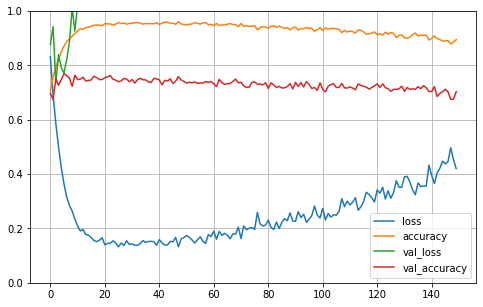

Sai số kiểm tra là :  1.8900216817855835
độ chính xác kiểm tra 0.7031000256538391


In [13]:
#vẽ đồ thị độ chính xác 
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

score = model.evaluate(x_test, y_test, verbose = 0)
print('Sai số kiểm tra là : ', score[0])
print('độ chính xác kiểm tra',score[1])

In [ ]:
from google.colab import files
upload = files.upload()

Saving 279045446_5196415497092920_139569175847110320_n.jpg to 279045446_5196415497092920_139569175847110320_n.jpg


array([6])

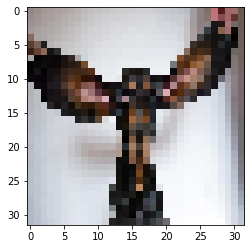

In [ ]:
from keras import models
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
model10=models.load_model('CNN_cifar10_final.h5')
img = load_img('279045446_5196415497092920_139569175847110320_n.jpg', target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/ 255
np.argmax(model500.predict(img),axis=1)